# MOLSIM HOMEWORK Week02    LINUX AND CODING BASICS

### Assigned data: January 21st, 2019
### Due data: January 25th, 2019

#### Change to directory of the MOLSIM repo and pull from github:  
#### Type `git pull` and return  
#### Change to directory  `/MOLSIM/Homeworks/Homeworks01` and copy ipython notebook `Homework01.ipynb` to your file (`Homework01_Coco.ipynb` for example).   
#### The first asignment includes two excercises: a bash scripting for text edit and a python scripting for data loading, analysis and plotting. Please write both bash script and python script in this ipython notebook.  Use `%% bash` as the first line in a bash code block.
#### When you finish writing this ipython notebook:   
git pull    
git add `Homework01_YOURNAME.ipynb`  
git commit -m "your notes here"    
git push     
 

## 1. Bash Scripting
Since we have not talked a lot about `awk` and `grep` in class, here are two examples to help you finish the task:  

#### 1） Takes an input file that looks like:     
1 2 3 4 5       
6 7 8 9 10     
11 12 13 14 15   
It will add/sum the first column of numbers:          

In [1]:
%%bash 
cat count.txt | awk '{ sum+=$1} END {print sum}'

cat: count.txt: No such file or directory


#### 2） Given a file `student_mark.txt` which has student marks:    
    
Jones 2143 78 84 77  
Gondrol 2321 56 58 45  
RinRao 2122 38 37  
Edwin 2537 87 97 95  
Dayan 2415 30 47  
    
#### Generate Pass/Fail based on marks:  


In [1]:
%%bash  
awk '{
if ($3 >=35 && $4 >= 35 && $5 >= 35)
    print $0,"=>","Pass";
else
    print $0,"=>","Fail";
}' student-marks

awk: fatal: cannot open file `student-marks' for reading (No such file or directory)


#### Please write a line of bash script to run the following two tasks:   
1) Given file `qua.pdb`, use `grep` and `awk` to find INDEX of all `Si` atom that z coordinate (FIELD #8) is larger than 5, and write output to `si.txt`. One index each line.   
2) Calculate the average z coordinate of `O` atom and ADD the output to `si.txt`.   

###  Write your answer here:

In [24]:
%%bash
awk '{
if ($3 ~ /Si/ && $8 > 5)
    print $0 > "si.txt";
}' qua.pdb
counts=0
sum=0
awk '{
if ($3 ~ "O")
    counts+=1
    sum+=$8;} END {print sum/counts >> "si.txt"
}' qua.pdb

## 2. Data analysis and visualization with python

### Make 1 * 2 subplots to plot data in `fes1.dat` and `fes2.dat`.   
### For each subplot:  
1) Load data using `numpy` or `pandas` library.    
2) Copy data in first column into an array X, and data in second column into an array Y. Ignore the comments if there are.   
3) From all values in Y, substract the minimum value of Y (translate Y to make minimum zero), then plot X vs Y.     
4) Label the plot as "DSS" and "DDD" for each data and put the legend at lower right.  
5) Set x axis limit to (0.2,1.73); set y axis limit to (0,20); use a shared y axis.      
6) Set title for each subplot to "DSS on TiO$_2$" and "DDD on TiO$_2$".   
7) Set font size of legend, x-label, y-label, x-ticks, y-ticks to 14, set font size of title to 20.   
8) Add two colored shadow in region 0.45 < x < 1 and 1.2 < x < 1.7. Use color code "#d62728", "#d62728" respectively.  
9) Use a tight layout.  
10）Output the plot as "plot.pdf"
![alt text](./matplotlib_exp.png)  
##  Please write your code here:

In [33]:
import numpy as np
import matplotlib.pyplot as mp

In [34]:
data1=np.loadtxt('fes1.dat')
data2=np.loadtxt('fes2.dat')

In [51]:
X1=[]
Y1=[]
X2=[]
Y2=[]
Y1_sub=[]
Y2_sub=[]
for i in range(len(data1)):
    if data1[i][0] <= 1.73:
        X1.append(data1[i][0])
        Y1.append(data1[i][1])
for i in range(len(Y1)):
    Y1_sub.append(Y1[i]-min(Y1))
for i in range(len(data2)):
    X2.append(data2[i][0])
    Y2.append(data2[i][1])
for i in range(len(data2)):
    Y2_sub.append(Y2[i]-min(Y2))

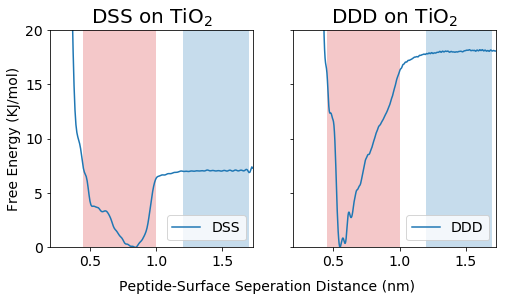

In [141]:
fig,axs=mp.subplots(1,2,sharey=True,figsize=(8,4))
mp.text(0,-4,'Peptide-Surface Seperation Distance (nm)',ha='center',fontsize=14)
axs[0].set_ylabel('Free Energy (KJ/mol)',fontsize=14)
axs[0].set_xlim(0.2,1.73)
axs[0].set_ylim(0,20)
axs[1].set_xlim(0.2,1.73)
axs[0].set_title('DSS on $\mathregular{TiO_2}$',fontsize=20)
axs[1].set_title('DDD on $\mathregular{TiO_2}$',fontsize=20)
axs[0].plot(X1,Y1_sub,label='DSS')
axs[1].plot(X2,Y2_sub,label='DDD')
axs[0].legend(loc='lower right',fontsize=14)
axs[1].legend(loc='lower right',fontsize=14)
mp.rc('xtick',labelsize=14)
mp.rc('ytick',labelsize=14)
axs[0].axvspan(0.45,1,facecolor='#d62728',alpha=0.25)
axs[1].axvspan(0.45,1,facecolor='#d62728',alpha=0.25)
axs[1].axvspan(1.2,1.7,facecolor='#1f77b4',alpha=0.25)
axs[0].axvspan(1.2,1.7,facecolor='#1f77b4',alpha=0.25)
mp.savefig('plot.pdf',bbox_inches='tight')